In [11]:
import os
import datajoint as dj
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dj.config['database.host'] = os.environ['DJ_HOST']
dj.config['database.user'] = os.environ['DJ_USERNAME']
dj.config['database.password'] = os.environ['DJ_PASSWORD']
dj.config['enable_python_native_blobs'] = True
schema = dj.schema('mdep_nnfabrik_mc_al', locals())
dj.config['schema_name'] = "mdep_nnfabrik_mc_al"

from nnfabrik.main import *
import nnfabrik as nnf

#nnf.config['repos'] = ['/notebooks/lib/nnfabrik']

/usr/local/lib/python3.7/dist-packages/datajoint/connection.py:211: UserWarning: MySQL server has gone away. Reconnecting to the server.
  warnings.warn("MySQL server has gone away. Reconnecting to the server.")


In [2]:
if dj.config['schema_name'] == "mdep_nnfabrik_mc_al":
    scores_al = TrainedModel().fetch('score', order_by='trainedmodel_ts')
    np.save('scores_al_mc', scores_al)
elif dj.config['schema_name']== "mdep_random_subsets_growing_mean":
    scores_random = TrainedModel().fetch('score', order_by='trainedmodel_ts')
    np.save('scores_random_mc', scores_random)

In [3]:
configs = Dataset().fetch('dataset_config', order_by='dataset_ts')

In [13]:
TrainedModel().fetch('score', order_by='trainedmodel_ts')

array([0.16558 , 0.1639  , 0.17    , 0.17798 , 0.17846 , 0.176095,
       0.18477 , 0.186335, 0.190749, 0.191089, 0.202978, 0.190634,
       0.197516, 0.20343 , 0.203001, 0.205888, 0.201245, 0.21315 ,
       0.211306, 0.213732, 0.2155  , 0.212553, 0.221808, 0.21316 ,
       0.21447 , 0.221732, 0.217024, 0.227902, 0.222446, 0.223345,
       0.221338, 0.228868, 0.228442, 0.230792, 0.233686, 0.227599,
       0.230516, 0.236857, 0.235459, 0.238805, 0.237637, 0.236976,
       0.235545, 0.243162, 0.243162, 0.240108, 0.240628, 0.242907,
       0.243717, 0.247264, 0.250339, 0.247028, 0.246137, 0.247938,
       0.246817, 0.253463, 0.252371, 0.250796, 0.253317, 0.251365,
       0.256285, 0.245725, 0.254136, 0.252671, 0.257096, 0.256454,
       0.261022, 0.257574, 0.2576  , 0.259092, 0.257806, 0.258683,
       0.260235, 0.251826, 0.261145, 0.262298, 0.266916, 0.263243,
       0.261248, 0.264902, 0.266855, 0.264157, 0.266006, 0.268388,
       0.267458, 0.264659, 0.267736, 0.268451, 0.268797, 0.272

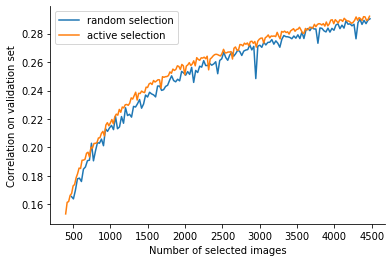

In [10]:
scores_random = np.load('scores_random_mc.npy')
scores_al = np.load('scores_al_mc.npy')
plt.plot(np.linspace(477, 4000 + 477, 150), scores_random, label='random selection')
plt.plot(np.linspace(400,4470, 205 ), scores_al, label='active selection')
plt.xlabel('Number of selected images')
plt.ylabel('Correlation on validation set')
plt.legend()
sns.despine()
plt.savefig('al_vs_rand', dpi=300)

In [16]:
Model()

configurator name of the configuration function,config_hash hash of the configuration object,config_object configuration object to be passed into the function,model_architect Name of the contributor that added this entry,model_comment short description,model_ts UTZ timestamp at time of insertion
nn_setup.models.create_model,7da27e2a8c94922f3ac74acfdb0f1867,=BLOB=,Matthias Depoortere,Best model hp on full dataset,2020-01-09 09:51:44


In [3]:
0.270617/0.295

0.9173457627118644

In [6]:
import seaborn as sns